<a href="https://colab.research.google.com/github/AndreAntonioCampos/FIAP_POS/blob/main/Tech_Challenge_Fase02.13.07.24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão de Fechamento Diário da IBOVESPA

## Introdução

O objetivo deste projeto é desenvolver um modelo preditivo para prever o fechamento diário da IBOVESPA utilizando dados históricos. Os dados utilizados incluem o fechamento diário do índice Bovespa, abrangendo o período de 2004 a 2024. Esta análise busca não apenas prever os valores futuros, mas também identificar padrões históricos e anomalias nos dados, fornecendo insights valiosos para a tomada de decisões financeiras.

## Visão Geral dos Dados (EDA):

### Coleta de Dados

Os dados foram capturados do site Investing.com, abrangendo o período de 01/01/2000 a 01/01/2024.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df_path = r'https://github.com/Tamireees/Tech_Challenge_Fase02/raw/main/Dados%20Hist%C3%B3ricos%20-%20Ibovespa%20(2004-2024).csv'

In [22]:
dados = pd.read_csv(df_path, sep=',', parse_dates=[0], index_col='Data')

In [23]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,"10,23M","0,57%"
31.01.2024,127.752,127.402,129.558,127.326,"12,50M","0,28%"
30.01.2024,127.402,128.492,128.492,127.105,"10,04M","-0,86%"
29.01.2024,128.503,128.970,129.068,127.853,"8,76M","-0,36%"
26.01.2024,128.967,128.196,129.252,127.869,"8,51M","0,62%"


In [24]:
dados.tail()


,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
08.01.2004,23.717,23.334,23.718,23.122,"436,74M","1,70%"
07.01.2004,23.320,23.576,23.899,23.320,"464,08M","-1,09%"
06.01.2004,23.576,23.532,23.976,23.180,"472,38M","0,19%"
05.01.2004,23.532,22.445,23.532,22.445,"496,71M","4,84%"
02.01.2004,22.445,22.233,22.450,22.208,"136,42M","0,94%"


In [25]:
dados.shape

(4974, 6)

### Exploração e limpeza dos dados

In [26]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4974 entries, 01.02.2024 to 02.01.2004
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4974 non-null   float64
 1   Abertura  4974 non-null   float64
 2   Máxima    4974 non-null   float64
 3   Mínima    4974 non-null   float64
 4   Vol.      4973 non-null   object 
 5   Var%      4974 non-null   object 
dtypes: float64(4), object(2)
memory usage: 272.0+ KB


In [27]:
def convert_to_float(value):
    if isinstance(value, str):
        value = value.replace('.', '').replace(',', '.')
        if 'M' in value:
            return float(value.replace('M', '')) * 1_000_000
        elif 'K' in value:
            return float(value.replace('K', '')) * 1_000
    return value

In [28]:
dados['Vol.'] = dados['Vol.'].apply(convert_to_float)
print(dados.head())

             Último  Abertura   Máxima   Mínima        Vol.    Var%
Data                                                               
01.02.2024  128.481   127.752  128.481  127.284  10230000.0   0,57%
31.01.2024  127.752   127.402  129.558  127.326  12500000.0   0,28%
30.01.2024  127.402   128.492  128.492  127.105  10040000.0  -0,86%
29.01.2024  128.503   128.970  129.068  127.853   8760000.0  -0,36%
26.01.2024  128.967   128.196  129.252  127.869   8510000.0   0,62%


In [29]:
def convert_percentage_to_float(value):
    if isinstance(value, str) and '%' in value:
        value = value.replace('%', '').replace(',', '.')
        if '-' in value:
            value = value.replace('-', '')
            return float(value) * -1
        else:
            return float(value)
    return value

In [30]:
dados['Var%'] = dados['Var%'].apply(convert_percentage_to_float)

print(dados.head())

             Último  Abertura   Máxima   Mínima        Vol.  Var%
Data                                                             
01.02.2024  128.481   127.752  128.481  127.284  10230000.0  0.57
31.01.2024  127.752   127.402  129.558  127.326  12500000.0  0.28
30.01.2024  127.402   128.492  128.492  127.105  10040000.0 -0.86
29.01.2024  128.503   128.970  129.068  127.853   8760000.0 -0.36
26.01.2024  128.967   128.196  129.252  127.869   8510000.0  0.62


In [31]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4974 entries, 01.02.2024 to 02.01.2004
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    4974 non-null   float64
 1   Abertura  4974 non-null   float64
 2   Máxima    4974 non-null   float64
 3   Mínima    4974 non-null   float64
 4   Vol.      4973 non-null   float64
 5   Var%      4974 non-null   float64
dtypes: float64(6)
memory usage: 272.0+ KB


In [32]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,10230000.0,0.57
31.01.2024,127.752,127.402,129.558,127.326,12500000.0,0.28
30.01.2024,127.402,128.492,128.492,127.105,10040000.0,-0.86
29.01.2024,128.503,128.970,129.068,127.853,8760000.0,-0.36
26.01.2024,128.967,128.196,129.252,127.869,8510000.0,0.62


In [33]:
dados.describe().T

,count,mean,std,min,25%,50%,75%,max
Último,4974.0,6.711666e+01,2.825580e+01,17.604,4.918100e+01,6.076400e+01,8.641500e+01,1.341940e+02
Abertura,4974.0,6.709595e+01,2.824949e+01,17.607,4.917550e+01,6.076250e+01,8.639650e+01,1.341940e+02
Máxima,4974.0,6.776688e+01,2.844366e+01,18.387,4.970075e+01,6.136650e+01,8.746175e+01,1.343920e+02
Mínima,4974.0,6.643207e+01,2.805835e+01,17.601,4.851325e+01,6.008150e+01,8.574500e+01,1.338320e+02
Vol.,4973.0,3.438505e+07,7.981133e+07,112100.000,2.820000e+06,4.450000e+06,1.215000e+07,9.949600e+08
Var%,4974.0,4.982509e-02,1.703218e+00,-14.780,-8.300000e-01,7.000000e-02,9.800000e-01,1.466000e+01


<Axes: >

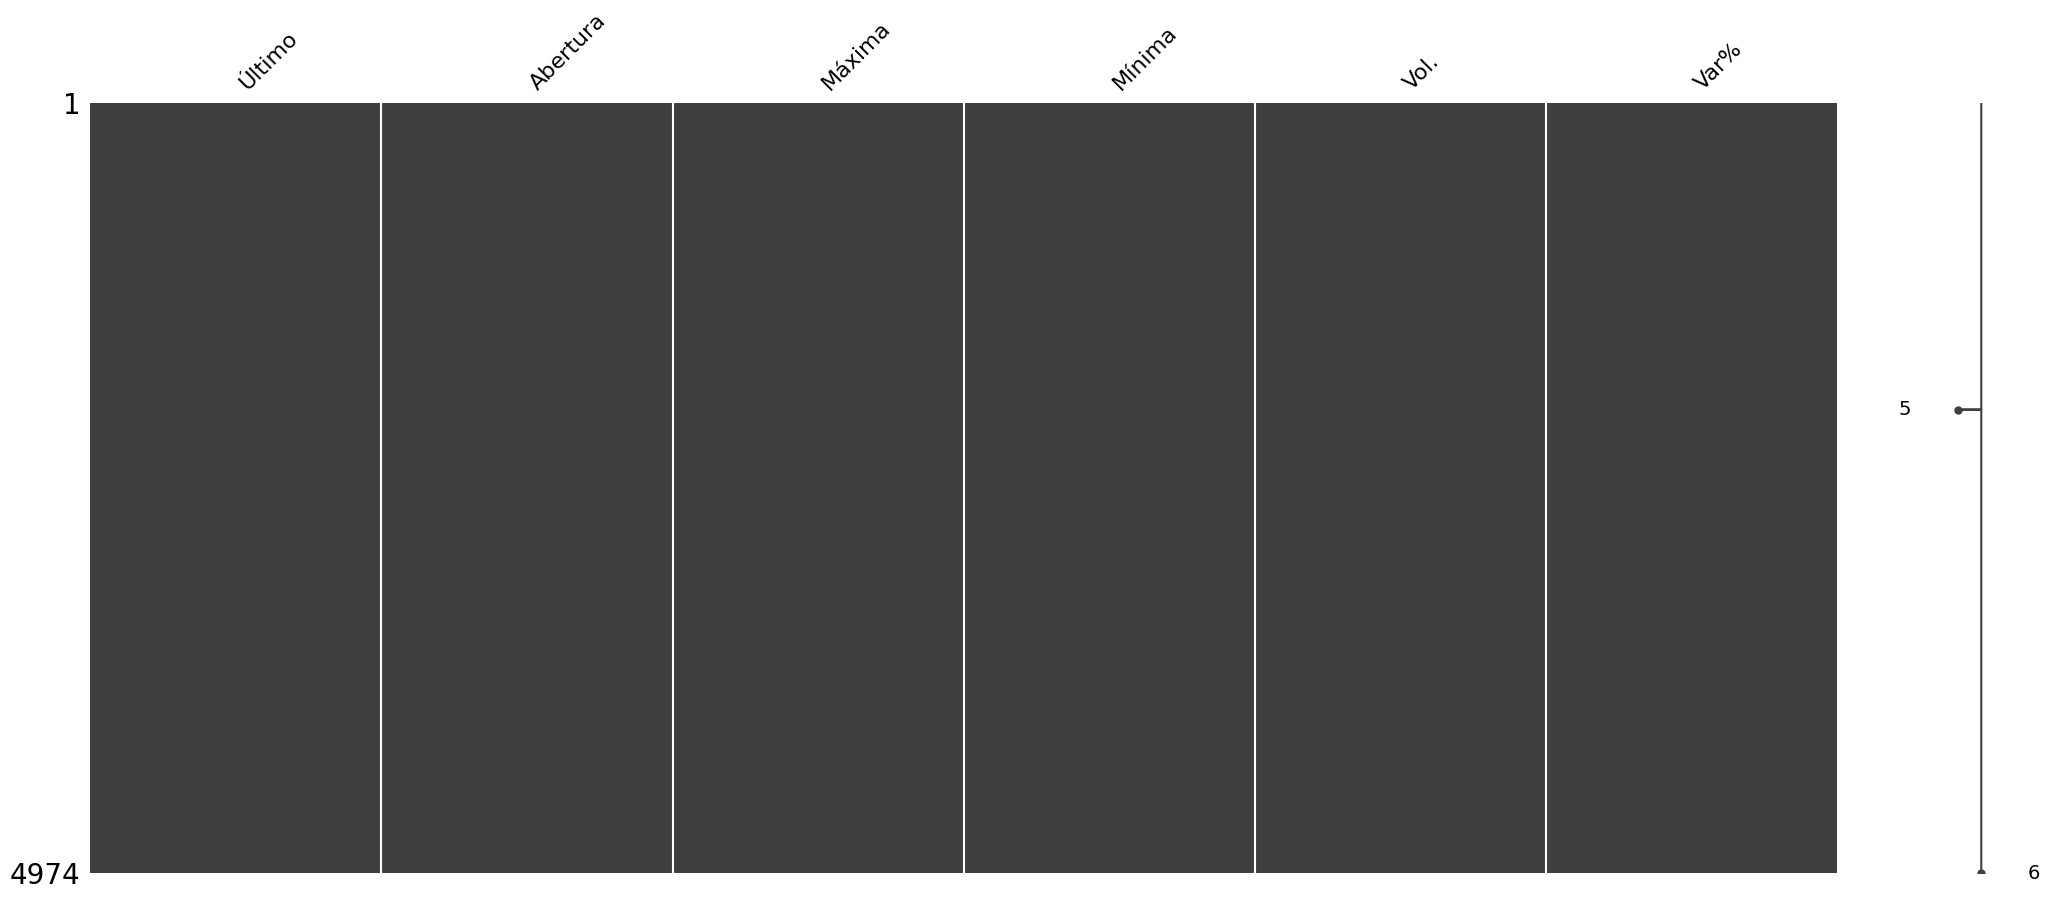

In [34]:
#Dados Nulos
import missingno as msno
msno.matrix(dados)

In [35]:
dados.isnull().sum()

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

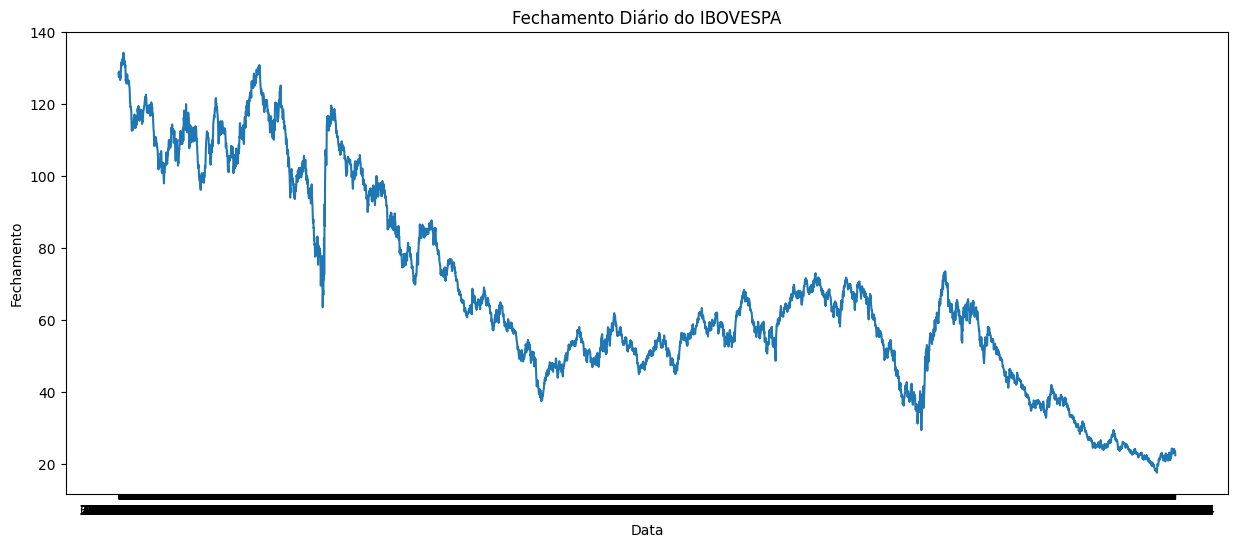

In [19]:
plt.figure(figsize=(15, 6))
plt.plot(dados['Último'])
plt.title('Fechamento Diário do IBOVESPA')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.show()



* O objetivo do gráfico é identificar anomalias nos dados, como outliers. Observamos que, em 2004, o valor de fechamento estava entre 120 e 140. Ao longo do tempo, esses valores oscilaram até que, em uma data específica (não visível na apresentação inicial do gráfico), ocorreu uma queda acentuada. Após essa queda, houve uma recuperação significativa. No entanto, até o ano de 2024, os valores apresentaram uma tendência de queda contínua.

Essa análise preliminar sugere a necessidade de uma investigação mais detalhada para identificar os fatores que causaram essas variações extremas e as tendências de longo prazo no valor de fechamento da Bovespa.

### Gráfico Boxplot para Detectar Outliers:

In [36]:
import seaborn as sns

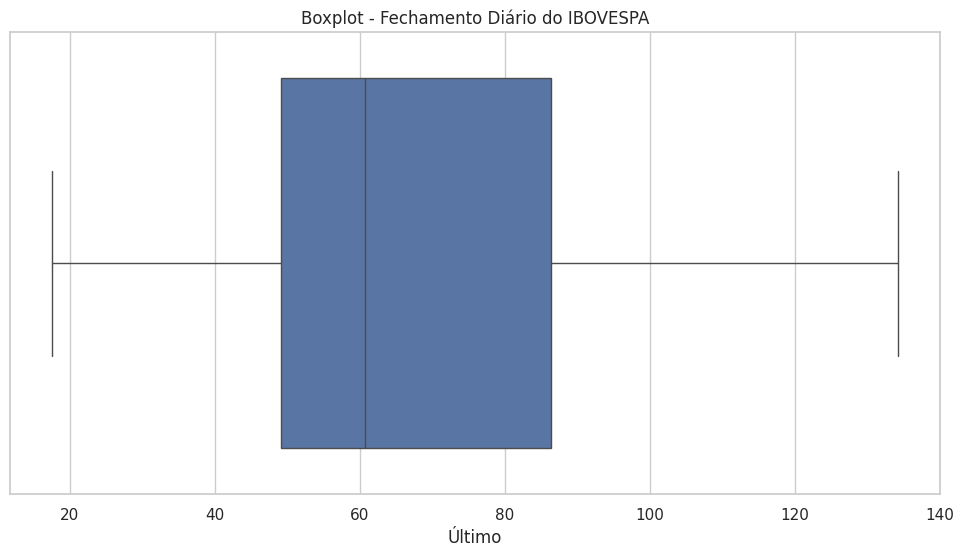

In [37]:
sns.set_theme(style="whitegrid")
fig, axes = plt.subplots(figsize=(12,6))
sns.boxplot(x=dados['Último'], data=dados)
axes.set_title('Boxplot - Fechamento Diário do IBOVESPA')
plt.show()


Os dados estão concentrados enttre 50 e 85 e não foram encontrados outliers

### Violin Plot para Ver Distribuição:

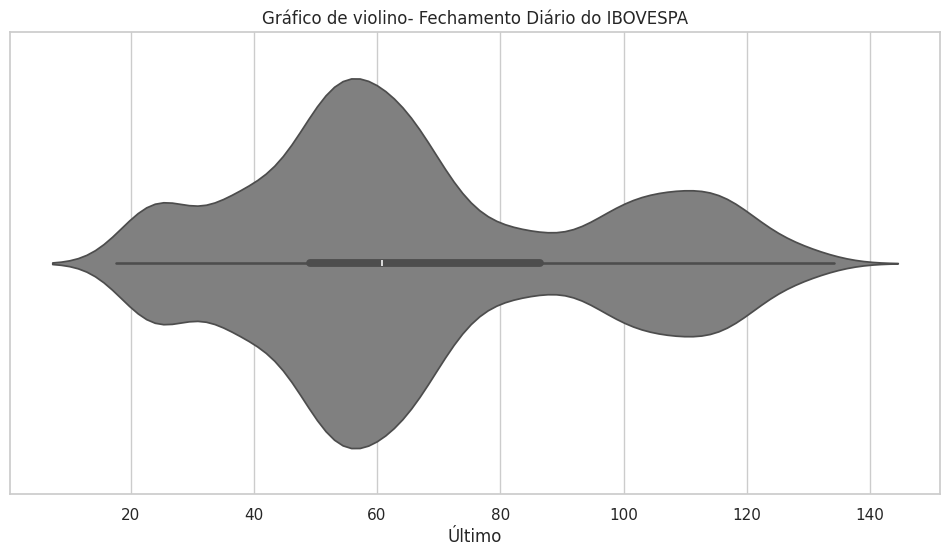

In [38]:
fig, axes = plt.subplots(figsize=(12,6))
sns.violinplot(x=dados['Último'], data=dados, color='gray')
axes.set_title('Gráfico de violino- Fechamento Diário do IBOVESPA')
plt.show()


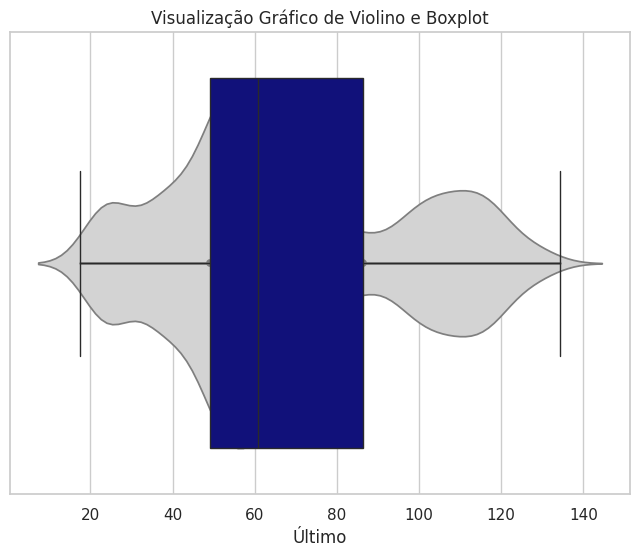

In [39]:
fig, ax = plt.subplots(figsize=(8,6))
sns.violinplot(x=dados['Último'], data=dados, ax=ax, color='lightgray')
sns.boxplot(x=dados['Último'], data=dados, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Gráfico de Violino e Boxplot')

plt.show()

### Heatmap de Correlações:

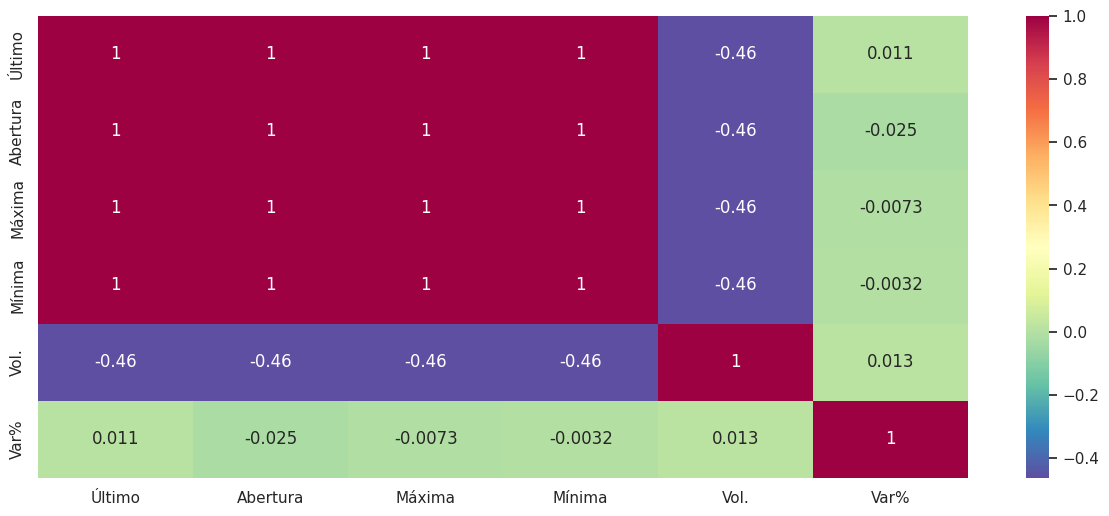

In [40]:
numeric_dados = dados.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_dados.corr()

# Plot the heatmap
plt.figure(figsize=(15, 6))
corr = sns.heatmap(correlation_matrix, annot=True, cmap="Spectral_r")
plt.show()

## Análise Temporal

### Decomposição da Série Temporal:

In [41]:
dados.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,10230000.0,0.57
31.01.2024,127.752,127.402,129.558,127.326,12500000.0,0.28
30.01.2024,127.402,128.492,128.492,127.105,10040000.0,-0.86
29.01.2024,128.503,128.970,129.068,127.853,8760000.0,-0.36
26.01.2024,128.967,128.196,129.252,127.869,8510000.0,0.62


In [42]:
# Agrupa os dados por ano e conta o número de entradas.
dados['Data'] = pd.to_datetime(dados.index, format='%d.%m.%Y', dayfirst=True)
dados['anual_dias'] = dados['Data'].dt.year

days_per_year = dados.groupby('anual_dias').size()

print(sum(days_per_year)/20)

248.7


In [43]:
!pip install statsmodels

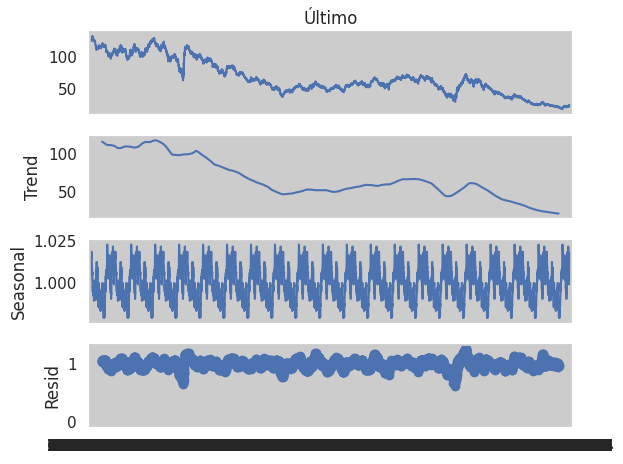

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dados['Último'], model='multiplicative', period=248) # Assumindo um ano de 248 dias úteis
result.plot()
plt.show()

### Autocorrelação e Autocorrelação Parcial

<Figure size 1400x700 with 0 Axes>

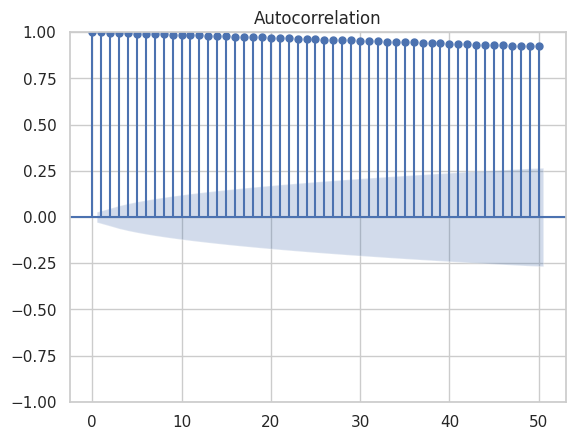

<Figure size 1400x700 with 0 Axes>

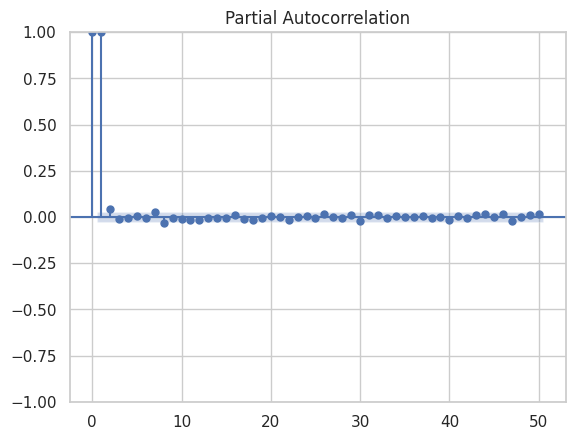

In [45]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# gráficos de autocorrelação e autocorrelação parcial para entender as dependências temporais nos dados.
plt.figure(figsize=(14, 7))
plot_acf(dados['Último'], lags=50)
plt.show()

plt.figure(figsize=(14, 7))
plot_pacf(dados['Último'], lags=50)
plt.show()

## Feature Engineering (Normalização e Padronização)

* Extração de Componentes de Data: Essas features podem ajudar a capturar padrões sazonais.

In [46]:
dados['Data'] = pd.to_datetime(dados.index, format='%d.%m.%Y', dayfirst=True)
dados['Dia'] = dados['Data'].dt.day
dados['Mês'] = dados['Data'].dt.month
dados['Ano'] = dados['Data'].dt.year
dados['Trimestre'] = dados['Data'].dt.quarter
dados['Dia_da_Semana'] = dados['Data'].dt.dayofweek
dados['Fim_de_Semana'] = dados['Dia_da_Semana'].apply(lambda x: 1 if x >= 5 else 0)

In [47]:
# Criação de lags: Lags são valores defasados de uma série temporal, ou seja, os valores anteriores a um ponto no tempo. Eles são usados para capturar dependências temporais nos dados.
# Na modelagem de séries temporais, os lags ajudam a prever o valor atual com base nos valores passados.

dados['Lag_1'] = dados['Último'].shift(1)  # shift() desloca a série temporal em n períodos, criando novas colunas.
dados['Lag_5'] = dados['Último'].shift(5)
dados['Lag_10'] = dados['Último'].shift(10)

# Criação de médias móveis

dados['MA_5'] = dados['Último'].rolling(window=5).mean()
dados['MA_10'] = dados['Último'].rolling(window=10).mean()
dados['MA_20'] = dados['Último'].rolling(window=20).mean()

In [48]:
# Média Móvel Exponencial
dados['EMA_10'] = dados['Último'].ewm(span=10, adjust=False).mean()
dados['EMA_20'] = dados['Último'].ewm(span=20, adjust=False).mean()

* Índice de Força Relativa (RSI): O Índice de Força Relativa (RSI) é um indicador técnico que mede a magnitude das recentes mudanças de preço para avaliar as condições de sobrecompra ou sobrevenda de um ativo.

(https://medium.com/@farrago_course0f/using-python-and-rsi-to-generate-trading-signals-a56a684fb1)


In [49]:
def calcular_RSI(data, window):
    delta = data.diff(1) # diff(1): Calcula a diferença entre o preço atual e o preço anterior
    gain = delta.where(delta > 0, 0) # Mantém as diferenças positivas e define as negativas como 0.
    loss = -delta.where(delta < 0, 0) # Mantém as diferenças negativas (como valores positivos) e define as positivas como 0.

    avg_gain = gain.rolling(window=window, min_periods=1).mean() # Calcula a média móvel dos ganhos e perdas.
    avg_loss = loss.rolling(window=window, min_periods=1).mean()

    rs = avg_gain / avg_loss # Relativa Força: ratio de ganho médio para perda média
    rsi = 100 - (100 / (1 + rs))
    return rsi

dados['RSI_14'] = calcular_RSI(dados['Último'], 14)

In [50]:
display(dados)

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Data,anual_dias,Dia,Mês,...,Fim_de_Semana,Lag_1,Lag_5,Lag_10,MA_5,MA_10,MA_20,EMA_10,EMA_20,RSI_14
Data,,,,,,,,,,,,,,,,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,10230000.0,0.57,2024-02-01,2024,1,2,...,0,NaN,NaN,NaN,NaN,NaN,NaN,128.481000,128.481000,NaN
31.01.2024,127.752,127.402,129.558,127.326,12500000.0,0.28,2024-01-31,2024,31,1,...,0,128.481,NaN,NaN,NaN,NaN,NaN,128.348455,128.411571,0.000000
30.01.2024,127.402,128.492,128.492,127.105,10040000.0,-0.86,2024-01-30,2024,30,1,...,0,127.752,NaN,NaN,NaN,NaN,NaN,128.176372,128.315422,0.000000
29.01.2024,128.503,128.970,129.068,127.853,8760000.0,-0.36,2024-01-29,2024,29,1,...,0,127.402,NaN,NaN,NaN,NaN,NaN,128.235759,128.333286,50.504587
26.01.2024,128.967,128.196,129.252,127.869,8510000.0,0.62,2024-01-26,2024,26,1,...,0,128.503,NaN,NaN,128.2210,NaN,NaN,128.368712,128.393640,59.190620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08.01.2004,23.717,23.334,23.718,23.122,436740000.0,1.70,2004-01-08,2004,8,1,...,0,23.917,22.962,22.969,23.8420,23.5693,23.22755,23.609230,23.290177,48.676730
07.01.2004,23.320,23.576,23.899,23.320,464080000.0,-1.09,2004-01-07,2004,7,1,...,0,23.717,23.399,23.302,23.8262,23.5711,23.30930,23.556643,23.293018,41.159251
06.01.2004,23.576,23.532,23.976,23.180,472380000.0,0.19,2004-01-06,2004,6,1,...,0,23.320,23.940,23.679,23.7534,23.5608,23.37405,23.560162,23.319968,42.636986


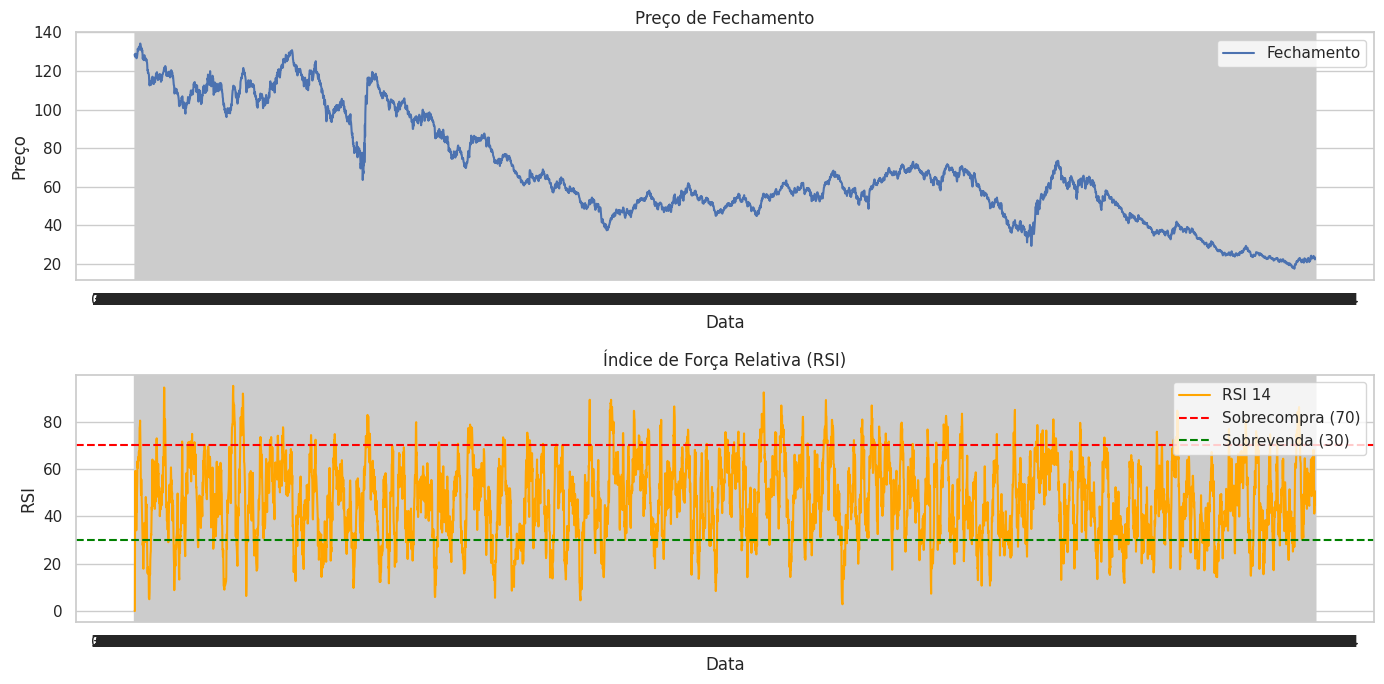

In [51]:
plt.figure(figsize=(14, 7))

# Preço de fechamento
plt.subplot(2, 1, 1)
plt.plot(dados['Último'], label='Fechamento')
plt.title('Preço de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()

# RSI
plt.subplot(2, 1, 2)
plt.plot(dados['RSI_14'], label='RSI 14', color='orange')
plt.axhline(y=70, color='red', linestyle='--', label='Sobrecompra (70)')
plt.axhline(y=30, color='green', linestyle='--', label='Sobrevenda (30)')
plt.title('Índice de Força Relativa (RSI)')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.legend()

plt.tight_layout()
plt.show()

Se o RSI está acima de 70, pode indicar que o ativo está sobrecomprado, sugerindo que o preço pode estar alto demais e pode ocorrer uma correção ou queda em breve.

Se o RSI está abaixo de 30, pode indicar que o ativo está sobrevendido, sugerindo que o preço pode estar baixo demais e pode ocorrer uma recuperação ou aumento em breve.

* Bandas de Bollinger: As Bandas de Bollinger são um indicador de volatilidade que cria uma banda superior e uma inferior em torno de uma média móvel simples.
https://algobulls.github.io/pyalgotrading/strategies/bollinger_bands/

In [52]:
def calcular_bollinger_bands(data, window):
    MA = data.rolling(window=window).mean() # Calcula a média móvel simples.
    std = data.rolling(window=window).std() # Calcula o desvio padrão móvel
    upper_band = MA + (std * 2)
    lower_band = MA - (std * 2)
    return upper_band, lower_band

dados['Upper_BB'], dados['Lower_BB'] = calcular_bollinger_bands(dados['Último'], 20)

In [53]:
display(dados)

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Data,anual_dias,Dia,Mês,...,Lag_5,Lag_10,MA_5,MA_10,MA_20,EMA_10,EMA_20,RSI_14,Upper_BB,Lower_BB
Data,,,,,,,,,,,,,,,,,,,,,
01.02.2024,128.481,127.752,128.481,127.284,10230000.0,0.57,2024-02-01,2024,1,2,...,NaN,NaN,NaN,NaN,NaN,128.481000,128.481000,NaN,NaN,NaN
31.01.2024,127.752,127.402,129.558,127.326,12500000.0,0.28,2024-01-31,2024,31,1,...,NaN,NaN,NaN,NaN,NaN,128.348455,128.411571,0.000000,NaN,NaN
30.01.2024,127.402,128.492,128.492,127.105,10040000.0,-0.86,2024-01-30,2024,30,1,...,NaN,NaN,NaN,NaN,NaN,128.176372,128.315422,0.000000,NaN,NaN
29.01.2024,128.503,128.970,129.068,127.853,8760000.0,-0.36,2024-01-29,2024,29,1,...,NaN,NaN,NaN,NaN,NaN,128.235759,128.333286,50.504587,NaN,NaN
26.01.2024,128.967,128.196,129.252,127.869,8510000.0,0.62,2024-01-26,2024,26,1,...,NaN,NaN,128.2210,NaN,NaN,128.368712,128.393640,59.190620,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
08.01.2004,23.717,23.334,23.718,23.122,436740000.0,1.70,2004-01-08,2004,8,1,...,22.962,22.969,23.8420,23.5693,23.22755,23.609230,23.290177,48.676730,24.901332,21.553768
07.01.2004,23.320,23.576,23.899,23.320,464080000.0,-1.09,2004-01-07,2004,7,1,...,23.399,23.302,23.8262,23.5711,23.30930,23.556643,23.293018,41.159251,24.817367,21.801233
06.01.2004,23.576,23.532,23.976,23.180,472380000.0,0.19,2004-01-06,2004,6,1,...,23.940,23.679,23.7534,23.5608,23.37405,23.560162,23.319968,42.636986,24.805475,21.942625


In [54]:
import matplotlib.pyplot as plt

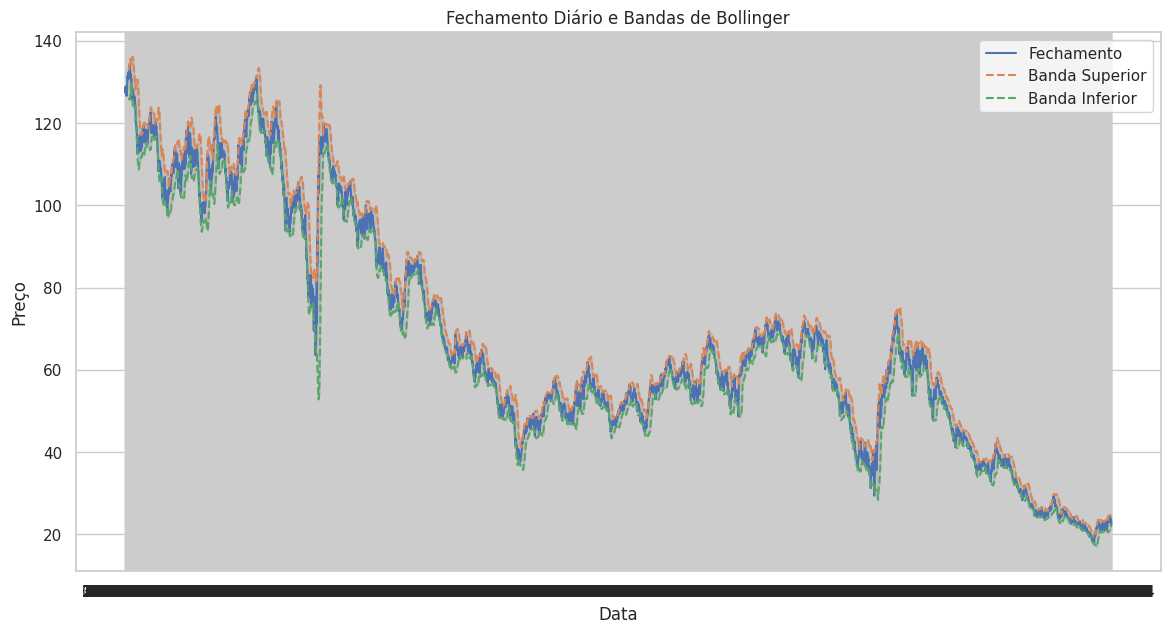

In [55]:

plt.figure(figsize=(14, 7))
plt.plot(dados['Último'], label='Fechamento')
plt.plot(dados['Upper_BB'], label='Banda Superior', linestyle='--')
plt.plot(dados['Lower_BB'], label='Banda Inferior', linestyle='--')
plt.fill_between(dados.index, dados['Upper_BB'], dados['Lower_BB'], color='gray', alpha=0.2)
plt.title('Fechamento Diário e Bandas de Bollinger')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.legend()
plt.show()

# As Bandas de Bollinger fornecem uma faixa de preço dentro da qual o ativo geralmente oscila, ajudando a identificar pontos de sobrecompra e sobrevenda.
# Quando o preço se aproxima ou ultrapassa as bandas, pode sinalizar uma possível reversão ou continuação da tendência.

* Volume e Volatilidade: O volume de negociações e a volatilidade são características importantes para entender a dinâmica do mercado. Eles ajudam a medir a atividade do mercado e a instabilidade dos preços, respectivamente.

In [56]:
dados['Var%'] = dados['Último'].pct_change() * 100 # Calcula a mudança percentual entre o preço atual e o preço anterior.

# A variação percentual diária mostra a mudança percentual no preço de fechamento de um dia para o próximo. É útil para medir a amplitude das mudanças diárias.

In [57]:
dados['Volatilidade_10'] = dados['Var%'].rolling(window=10).std() # Calcula o desvio padrão móvel para os últimos 10 dias, representando a volatilidade.
dados['Volatilidade_20'] = dados['Var%'].rolling(window=20).std()

# A volatilidade mede a variação do preço de um ativo ao longo do tempo. Ela indica o quão estável ou instável é o preço do ativo. Altos valores de volatilidade significam grandes
# flutuações no preço, enquanto baixos valores indicam flutuações menores.

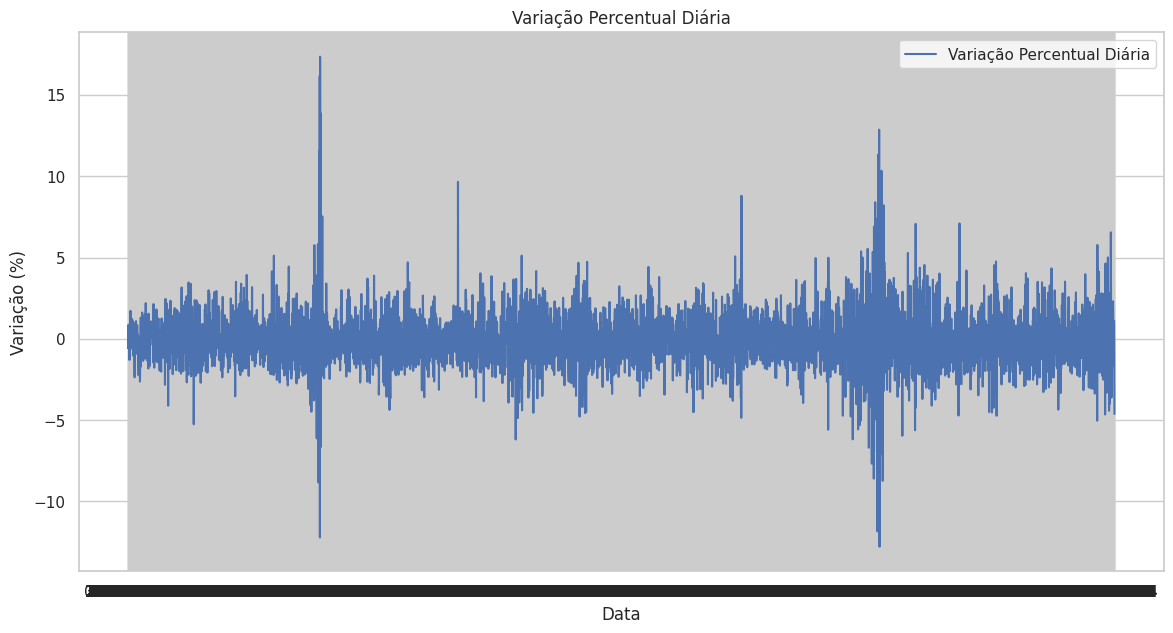

In [58]:
plt.figure(figsize=(14, 7))
plt.plot(dados['Var%'], label='Variação Percentual Diária')
plt.title('Variação Percentual Diária')
plt.xlabel('Data')
plt.ylabel('Variação (%)')
plt.legend()
plt.show()

Melhorar a variacao percentual diaria ***********************

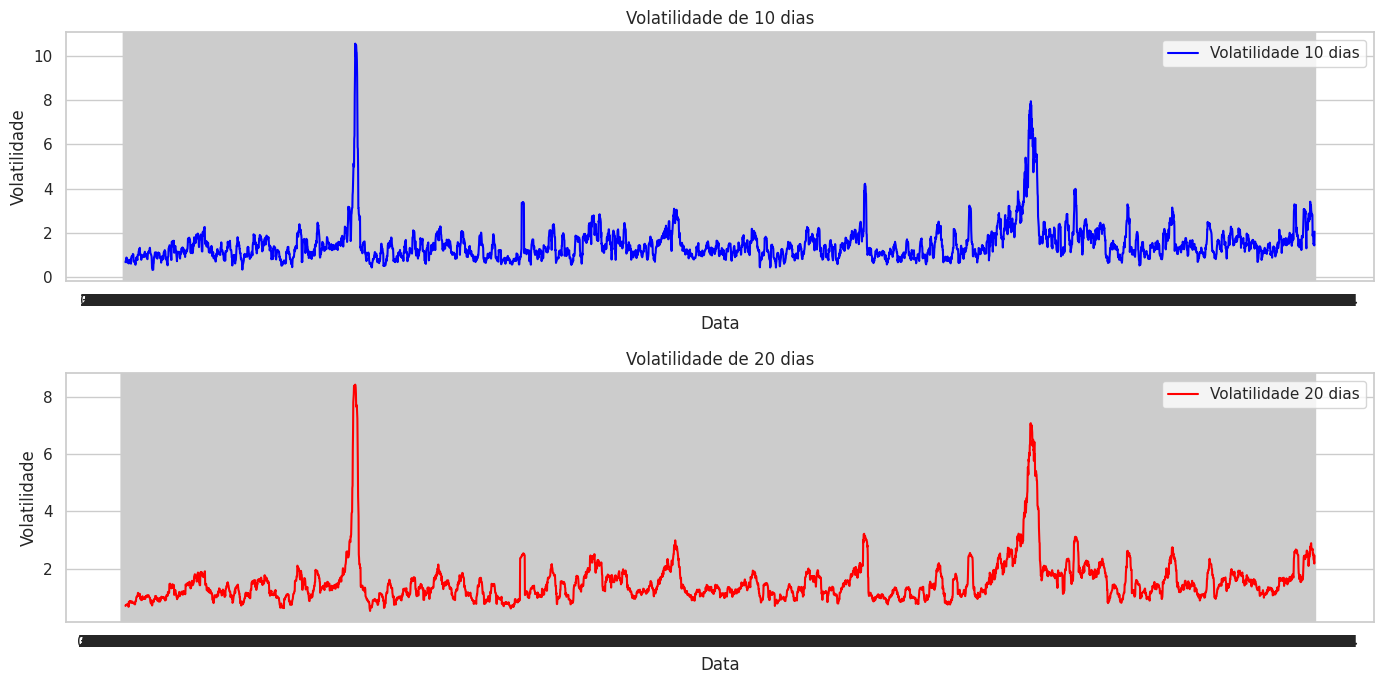

In [59]:
plt.figure(figsize=(14, 7))

# Volatilidade de 10 dias
plt.subplot(2, 1, 1)
plt.plot(dados['Volatilidade_10'], label='Volatilidade 10 dias', color='blue')
plt.title('Volatilidade de 10 dias')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

# Volatilidade de 20 dias
plt.subplot(2, 1, 2)
plt.plot(dados['Volatilidade_20'], label='Volatilidade 20 dias', color='red')
plt.title('Volatilidade de 20 dias')
plt.xlabel('Data')
plt.ylabel('Volatilidade')
plt.legend()

plt.tight_layout()
plt.show()

In [60]:
dados = dados.dropna()


In [61]:
print(dados.head())

             Último  Abertura   Máxima   Mínima       Vol.      Var%  \
Data                                                                   
04.01.2024  131.226   132.831  132.885  131.024  8970000.0 -0.603683   
03.01.2024  132.834   132.697  133.576  132.250  8700000.0  1.225367   
02.01.2024  132.697   134.186  134.195  132.095  8440000.0 -0.103136   
28.12.2023  134.185   134.194  134.392  133.832  7810000.0  1.121352   
27.12.2023  134.194   133.523  134.195  133.328  6170000.0  0.006707   

                 Data  anual_dias  Dia  Mês  ...      MA_5     MA_10  \
Data                                         ...                       
04.01.2024 2024-01-04        2024    4    1  ...  131.5928  130.8940   
03.01.2024 2024-01-03        2024    3    1  ...  131.9914  131.3250   
02.01.2024 2024-01-02        2024    2    1  ...  132.2414  131.6653   
28.12.2023 2023-12-28        2023   28   12  ...  132.5930  131.9317   
27.12.2023 2023-12-27        2023   27   12  ...  133.0272  132

## Treinamento do Modelo

In [112]:
features = ['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Dia', 'Mês', 'Ano', 'Trimestre', 'Dia_da_Semana',
            'Fim_de_Semana', 'Lag_1', 'Lag_5', 'Lag_10', 'MA_5', 'MA_10', 'MA_20', 'EMA_10', 'EMA_20',
            'RSI_14', 'Upper_BB', 'Lower_BB', 'Var%', 'Volatilidade_10', 'Volatilidade_20']
target = 'Último'

x = dados[features]
y = dados[target]

In [113]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [95]:
predicoes = modelo.predict(X_test)

In [96]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predicoes)
print(f"Erro Quadrático Médio (MSE): {mse}")

Erro Quadrático Médio (MSE): 0.7021193823216705


In [97]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predicoes)
print(f"Coeficiente de Determinação (R²): {r2}")

Coeficiente de Determinação (R²): 0.99547026877569


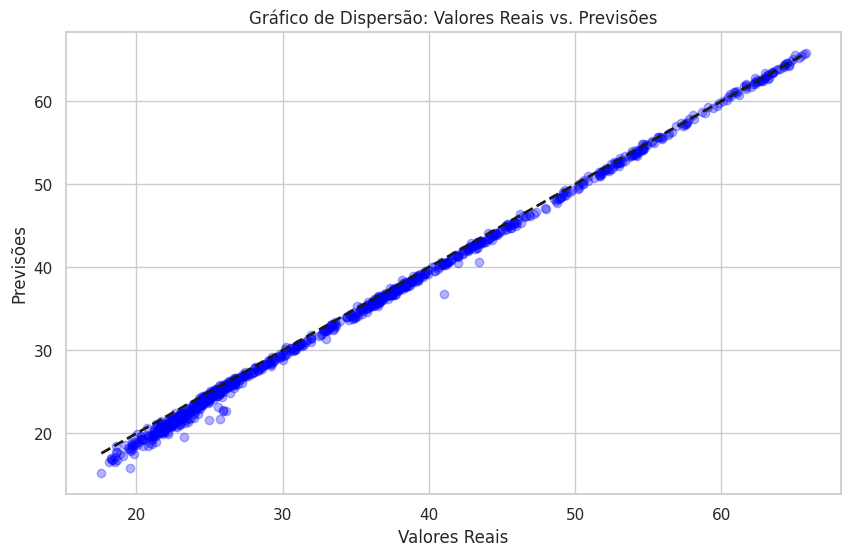

In [98]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicoes, color='blue', alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reais')
plt.ylabel('Previsões')
plt.title('Gráfico de Dispersão: Valores Reais vs. Previsões')
plt.show()

* Todos os pontos estão próximos da linha diagonal, o que indica que as previsões do modelo estão bastante alinhadas com os valores reais. Isso é um excelente sinal de que o modelo está capturando bem a variação nos dados de fechamento da IBOVESPA.

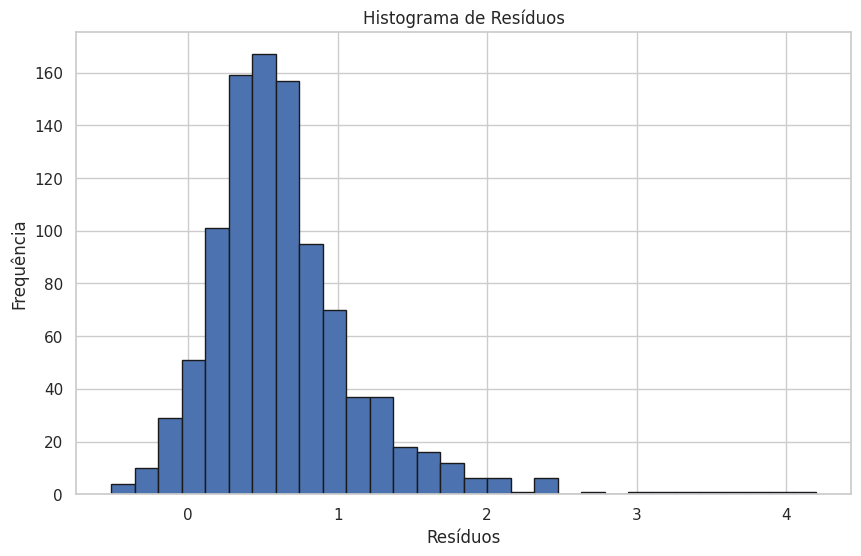

In [99]:
residuos = y_test - predicoes

plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, edgecolor='k')
plt.xlabel('Resíduos')
plt.ylabel('Frequência')
plt.title('Histograma de Resíduos')
plt.show()

https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96

* Os resíduos estão distribuídos de maneira aproximadamente normal em torno de zero. Isso sugere que o modelo não possui viés sistemático e está capturando a maior parte da variabilidade dos dados. A presença de uma distribuição normal nos resíduos é uma condição desejável para modelos de regressão.

### **ARVORE DE DECISÃO (DecisionTreeRegressor)**

Modelo de Arvore de Decisão: Um modelo de DecisionTreeRegressor é um modelo de árvore de decisão utilizado para resolver problemas de regressão. Esse tipo de técnica cria uma estrutura em forma de árvore para mapear relações não lineares entre as variáveis preditoras e a variável alvo.



In [100]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor(random_state=7, max_depth=10)

model_dtr.fit(X_train, y_train)

y_pred_model_dtr = model_dtr.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test, y_pred_model_dtr)
print('MAE',MAE)
MSE = mean_squared_error(y_test, y_pred_model_dtr)
print('MSE',MSE)
r2 = r2_score(y_test, y_pred_model_dtr)
print('r²',r2)

MAE 4.478076456896349
MSE 42.23433868393984
r² 0.7275246809992237


# **CONCLUSÃO**

No modelo de arvore de decisão (DecisionTreeClassifier) mostrou que o r2 Quadrado foi o que melhor performou com 73%


Visão Grafica dos modelos

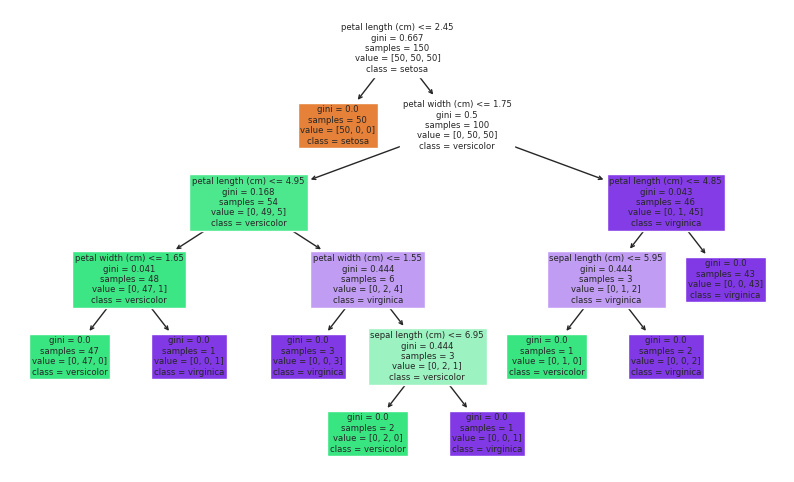

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import tree

# Importe o dataset (exemplo com Iris dataset)
data = load_iris()
X, y = data.data, data.target

# Crie o modelo de árvore de decisão
model = DecisionTreeClassifier()
model.fit(X, y)

# Visualize a árvore de decisão
plt.figure(figsize=(10, 6))
tree.plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.show()



Não consegui ter uma interpretação do grafico de arvore de decisão.. preciso de ajuda.

# **ARVORE DE DECISÃO (RandomForestClassifier)**

O RandomForestClassifier é um classificador de floresta aleatória em Python. Ele faz parte da biblioteca scikit-learn e é usado para resolver problemas de classificação. Aqui estão os principais pontos sobre o RandomForestClassifier:

O que é uma Floresta Aleatória? Uma floresta aleatória é um metaestimador que combina vários classificadores de árvore de decisão em subamostras diferentes do conjunto de dados. Ela usa a média das previsões dessas árvores para melhorar a precisão preditiva e controlar o overfitting.

Como funciona: Cada árvore na floresta é treinada em uma subamostra aleatória dos dados. As árvores usam a melhor estratégia de divisão (equivalente a passar splitter="best" para o DecisionTreeRegressor subjacente). A floresta combina as previsões de todas as árvores para obter uma previsão final.

Parâmetros importantes: n_estimators: O número de árvores na floresta. criterion: A função para medir a qualidade de uma divisão (por exemplo, “gini” ou “entropy”). max_depth: A profundidade máxima da árvore. E outros parâmetros relacionados à divisão e tamanho mínimo das amostras.

Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Visão Grafica do modelo

In [131]:
features = ['Abertura', 'Máxima', 'Mínima', 'Vol.', 'Dia', 'Mês', 'Ano', 'Trimestre', 'Dia_da_Semana',
            'Fim_de_Semana', 'Lag_1', 'Lag_5', 'Lag_10', 'MA_5', 'MA_10', 'MA_20', 'EMA_10', 'EMA_20',
            'RSI_14', 'Upper_BB', 'Lower_BB', 'Var%', 'Volatilidade_10', 'Volatilidade_20']
target = 'Último'

x = dados[features]
y = dados[target]

In [132]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=7)

In [135]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(random_state=7)
model_rf.fit(y_test, x_test)

ValueError: Expected 2D array, got 1D array instead:
array=[ 55.951  65.224  55.544  64.308  70.075  45.21  125.96   96.168  97.926
  53.979  26.702  54.463  51.082  58.458  53.15   51.626 112.696  53.907
  61.06   57.696  95.444  59.281  63.297 117.272  70.673  69.387 122.964
  57.542  58.298  50.43   79.065 100.689  47.651  28.045  71.897 112.9
  66.688  75.187  59.337 120.211  34.83  115.313 102.807  47.711 119.921
  51.718  26.068  55.164  64.62   45.698  21.737  48.026 101.882  26.47
  21.317 105.798  51.874  86.067  88.515 104.481  34.374  57.199 104.7
  57.684  79.637  42.37   24.367  21.532  70.451  48.915  39.751  66.191
  38.406 100.724  24.855 134.194  64.984  26.789  23.411  71.736  40.92
  51.811  58.083  47.758  42.794  65.044  53.15   53.155  99.77   36.224
  75.976 120.595  38.63   53.327  61.841  57.177  62.312  67.538  66.887
  48.551  49.647  49.181  51.245  50.601 111.879  50.405  62.892  60.968
  46.148  61.942  63.312  43.157  20.763  58.965  66.968  66.443  52.203
 116.149  51.049  57.369  94.056  97.602  25.321 105.078  88.115  66.992
 122.988 112.461 112.234  41.334  83.118  48.374  56.499  58.627 108.464
  60.582  39.638  49.182 119.221  61.08   47.735 120.356  67.184  75.092
  64.288  26.618  22.969  54.431 109.916 113.681  88.419  24.03  120.934
  63.686  63.886  36.399  40.076  59.571  51.465  58.697  38.594  53.055
  25.026  43.288 100.221  44.182  67.953  27.411  24.45  125.095  37.058
  56.824  66.572  67.868  22.261  54.674  25.222  49.843  57.661  67.461
  78.116  62.188  65.639  71.785  47.093  53.029  58.545  61.234  73.367
  68.394  21.755  43.755  36.413  61.518 114.064  66.327  26.308  50.011
  24.806  43.2    51.486 110.979 106.247  55.44  110.622  24.763  76.201
  56.54   99.595 115.057  61.215  62.55   64.54  115.754  56.384  38.246
  67.902  53.737 114.827  67.899 111.713  61.738  96.203  55.322  99.137
 106.639  32.48   50.156  56.754  66.908  35.475  36.23   35.792  41.979
 111.184 104.385  41.519  48.096  66.041  94.016  25.659  54.377  32.848
  53.402  95.307 112.256  71.629 119.472  55.815  47.787 127.468  30.952
 116.147 118.322  56.35   65.925  48.542  65.269  64.872  61.665  47.609
  62.511  60.162  51.127 122.386  47.056  31.489  59.962  68.222  54.873
  21.318 101.506  57.347  49.922  62.969  24.699  62.322  38.322  67.749
  61.32  114.07   52.64   43.297  65.82  103.922 115.253 101.847  50.165
  54.384  98.589  22.102 104.089  31.945  37.645  49.071  38.485  65.668
  84.977  54.029  26.61  119.209  86.371  70.423  57.937 107.379  20.284
  52.548 119.18  113.431  39.015  57.144  97.677  98.212  24.17   61.479
  75.974  35.438  70.045 113.076  70.967  69.918  53.864  58.498 120.701
 119.646  66.989  44.433  56.275  70.579  64.21   66.341  52.481  52.816
  53.63   57.594  48.665 123.255  56.286  62.071 107.381 118.812  50.686
  76.591  53.991 102.923  63.531  45.805  49.013  51.172  44.545  63.937
  56.641  80.687  20.708  67.692  56.666  86.886  99.681  67.119  63.527
  62.106  54.392  94.864  21.737  49.463  50.865  64.383 111.4    76.055
 118.435 104.053  85.641  96.932  61.837 114.019 102.062  25.051  22.876
  65.748 113.899  96.558 104.115  94.474 118.977  65.266  92.875  84.525
  33.298  66.575  63.652 110.794 125.666  49.178  93.952  64.06  110.25
  35.337  61.75   37.272  51.847 120.701  69.268 119.371  48.84   36.375
  27.095  60.759  63.747  59.339  38.717  52.76   40.612  58.052  55.386
  36.17  105.135  54.602 115.742  57.66  118.243 128.057  55.377 100.73
  53.106  32.922  77.996 109.13   84.334  72.607  86.42   60.936  51.544
  38.249 116.171  22.53   44.998  46.869  54.408  46.847  47.597  21.
  53.976  19.4    61.947  61.546 103.876  45.12   24.917  55.371  66.627
  48.01  119.528 102.782  43.466 118.135 114.344  57.853  98.309 115.166
  45.286 119.053  83.847  58.288  68.594  56.647  37.569 114.315 108.977
  74.487  52.352  25.9    26.518  54.063  29.086  37.423  29.88  104.397
  58.212 114.629  24.816  78.898  37.698  29.068  67.719  68.622  62.211
  51.3    49.815  57.358  34.799  28.075  64.671  49.703  46.919  59.421
  51.427  99.057  52.344  54.324 114.851  58.62   35.797  70.405  56.892
  38.63   58.827  80.506  76.117  62.456 103.165 130.208  36.682  25.271
  57.54  103.704 119.696  25.831  22.928  41.543  60.644  34.661  59.248
  67.584 130.076  55.707  62.368  21.57   63.161  74.363  45.533  54.018
  52.138 132.753  53.944  47.363  61.293  41.57   68.325  63.673  56.46
  35.049  58.037  65.059  59.567 121.242  64.541  50.349 107.558  56.792
  64.677  51.151  52.801 114.06   61.971  53.1    54.573 107.431  65.795
  58.512  57.195  53.856  64.585 105.711  97.369  64.64  117.841  93.002
  39.053  56.238 123.989  30.059  45.631  22.373  35.297  48.914  47.364
 112.316  20.333  48.054  85.378 109.349  36.944  41.017  41.162  62.198
  66.216  64.085  67.359  58.406  51.804  45.361  97.645  18.62  101.869
  99.588 101.34  115.371  49.593  26.117  59.478  56.594  67.766  73.915
  68.588  67.705 109.698 108.376  69.838  46.108  63.258  48.214  55.883
 119.564  38.427 100.27   72.546  96.292 119.74   75.604  35.13   58.823
  50.087  81.435  99.622  95.343 114.586  55.78   26.298 107.364  23.058
  85.861  22.962  58.143  53.473 108.213  41.888  77.496  55.407  54.273
 115.129  74.294  49.533  37.368 101.202  56.195  72.123  62.871  68.2
  72.429  71.905  62.674  76.789 112.785  92.795 110.745  25.474  53.929
  42.67   70.32  105.53   23.954  61.7    47.043  62.486  39.544  70.614
  39.751  43.145  55.108 119.376 107.383  57.064  52.811  33.223 130.126
  53.748  63.866 115.837  60.046  70.012  55.932 104.745  22.043 102.143
  64.521  65.145 118.176  50.121  46.145  55.703  66.69   61.598  28.828
  66.674  56.584  45.313  61.958  22.281  45.261 112.517  42.521 104.426
  96.567  25.723  67.406 108.256  19.819  45.82   19.19   42.978  63.562
  47.065  24.205  47.772  86.4    97.02   42.667 104.477  59.602  29.227
  62.445  58.043  89.82   76.678  57.94  132.697 107.664  47.227  69.538
  47.71  110.227 122.592  38.242  57.061  99.054  46.908  51.463  57.35
  40.406  22.803 119.177 114.482  18.86   22.361  57.775 105.551 106.335
  65.585  71.83   59.365  22.513 115.309  43.935  54.54   72.166  58.407
  51.618  22.445 110.565  70.92   27.402  92.214  99.033  93.834  55.91
  77.557  57.116  83.913  62.023  63.934  64.223  49.443  99.334  86.23
  97.467  52.33   55.696 118.695  54.513 113.607  61.201 112.299 113.413
  33.456  69.401 121.909  56.653  67.282  36.486  27.261  56.616  27.291
  45.778  96.236  37.329  51.239  53.446  24.117  62.98   38.539  70.195
  67.317  47.813  44.642  63.194  62.065  22.993  89.04  131.851  46.517
  22.869  46.265 100.751 126.004  51.792 113.813  38.795  64.003  58.546
  56.864  76.819  69.052  60.8    52.015 117.457  64.64   49.534 108.488
 112.253 113.032  69.885  62.153  85.804  50.598  53.92   38.132  48.648
  53.348  67.54   54.042  65.534  49.3    54.908  78.625  36.232 115.311
  64.15   68.816  69.366  90.024 101.006  56.038  26.712  51.409  95.528
 108.928  84.084  69.318  59.647  40.606  49.661 109.928 126.035 101.793
 121.933  51.902  61.652  25.563  62.662  55.347 103.906  20.026  25.722
  55.701 108.942  64.567  63.954  38.183  66.003  65.831  61.497  54.894
  62.625  85.602  61.22   42.419  54.244  38.18  110.333  41.583  69.801
  64.168  61.493 108.719  58.3    35.805  91.012  48.074  22.935 101.438
  39.511 105.319  84.377  27.385  63.76   65.855  97.457  57.264  59.317
  43.911  48.736  57.886  62.056  56.873  94.588  39.93   55.755  56.698
  61.272  36.557 106.625  97.867  54.001  59.184  64.158  35.128  69.729
  22.749  38.828  44.391 102.948  49.696 107.876 113.001  51.645  38.291
  51.201  56.372  23.32   53.166 110.501  41.029  70.835  49.427  54.63
 116.464  50.415  93.531  65.692  47.701  97.821  36.74   67.87   40.822
 108.368  50.504  27.375 118.478  29.498  21.67   69.909  53.735  77.891
  74.788 118.35   51.631  94.637  70.721  81.312  50.511  98.542  23.208
  69.421  51.499  25.261 102.819  20.951  25.678  54.629  56.33   56.286
  63.218  50.908  86.537  55.488  62.696  55.829  52.322  53.832  60.998
  70.809].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [128]:
model_rf = RandomForestClassifier(random_state=7)

In [130]:
model_rf.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [122]:
model_rfc.fit(x_train, y_train)

ValueError: Unknown label type: 'continuous'

In [101]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier(random_state=7, max_depth=10)

model_rfc.fit(X_train, y_train)

y_pred_model_rfc = model_rfc.predict(X_test)


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

MAE = mean_absolute_error(y_test, y_pred_model_rfc)
print('MAE',MAE)
MSE = mean_squared_error(y_test, y_pred_model_rfc)
print('MSE',MSE)
r2 = r2_score(y_test, y_pred_model_rfc)
print('r²',r2)


ValueError: Unknown label type: 'continuous'

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Certifique-se de que y_train seja uma matriz unidimensional de rótulos
# Se necessário, use LabelEncoder para codificar os rótulos
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

model_rfc = RandomForestClassifier(random_state=7, max_depth=10)
model_rfc.fit(X_train, y_train_encoded)
y_pred_model_rfc = model_rfc.predict(X_test)

KeyboardInterrupt: 

In [83]:
# Dados de exemplo (substitua pelos seus dados reais)
x_test = np.arange(len(y_test))  # Cria um vetor de índices para o eixo X
plt.plot(x_test, y_test, label='Valores reais', marker='o')
plt.plot(x_test, y_pred_model_dtr, label='Previsões', linestyle='--')

plt.xlabel('Amostras de teste')
plt.ylabel('Valores')
plt.title('Comparação entre valores reais e previsões (Árvore de Decisão)')
plt.legend()  # Adiciona a legenda com os rótulos

plt.show()


NameError: name 'np' is not defined

**ARVORE DE DECISÃO (RandmForestClassifier)**

O RandomForestClassifier é um classificador de floresta aleatória em Python. Ele faz parte da biblioteca scikit-learn e é usado para resolver problemas de classificação. Aqui estão os principais pontos sobre o RandomForestClassifier:

O que é uma Floresta Aleatória?
Uma floresta aleatória é um metaestimador que combina vários classificadores de árvore de decisão em subamostras diferentes do conjunto de dados.
Ela usa a média das previsões dessas árvores para melhorar a precisão preditiva e controlar o overfitting.

Como funciona:
Cada árvore na floresta é treinada em uma subamostra aleatória dos dados.
As árvores usam a melhor estratégia de divisão (equivalente a passar splitter="best" para o DecisionTreeRegressor subjacente).
A floresta combina as previsões de todas as árvores para obter uma previsão final.

Parâmetros importantes:
n_estimators: O número de árvores na floresta.
criterion: A função para medir a qualidade de uma divisão (por exemplo, “gini” ou “entropy”).
max_depth: A profundidade máxima da árvore.
E outros parâmetros relacionados à divisão e tamanho mínimo das amostras.

Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.x, data.y, test_size=0.2, random_state=42)

In [ ]:
# Crie o modelo de Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Treine o modelo
model.fit(X_train, y_train)

# Faça previsões
y_pred = model.predict(X_test)

In [ ]:
# Avalie a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

In [ ]:
import matplotlib.pyplot as plt

# Valores para o gráfico
labels = ['Acurácia']
values = [accuracy]

# Crie o gráfico de barras
plt.bar(labels, values, color='skyblue')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Acurácia do Modelo de Random Forest')
plt.ylim(0, 1)  # Defina o limite do eixo Y para melhor visualização

# Adicione os valores acima das barras
for i, v in enumerate(values):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()


## Resultados:

### Avaliação do modelo

### Visualização dos resultados

### Discussão sobre a acuracidade atingida

## Conclusão

### Sumário dos resultados

### Próximos passos

**Teste Debora**

Teste 2 Debora